In [322]:
import pandas as pd
import numpy as np
from plotnine import *

1. merging 10 US vital data sets and cleaning

In [323]:
df1 = pd.read_csv("Underlying Cause of Death, 2006.txt",  delimiter="\t")
df2 = pd.read_csv("Underlying Cause of Death, 2007.txt",  delimiter="\t")
df3 = pd.read_csv("Underlying Cause of Death, 2008.txt",  delimiter="\t")
df4 = pd.read_csv("Underlying Cause of Death, 2009.txt",  delimiter="\t")
df5 = pd.read_csv("Underlying Cause of Death, 2010.txt",  delimiter="\t")
df6 = pd.read_csv("Underlying Cause of Death, 2011.txt",  delimiter="\t")
df7 = pd.read_csv("Underlying Cause of Death, 2012.txt",  delimiter="\t")
df8 = pd.read_csv("Underlying Cause of Death, 2013.txt",  delimiter="\t")
df9 = pd.read_csv("Underlying Cause of Death, 2014.txt",  delimiter="\t")
df10 = pd.read_csv("Underlying Cause of Death, 2015.txt",  delimiter="\t")

In [324]:
# merging 10 data sets

df=[df1,df2,df3, df4, df5, df6, df7, df8, df9, df10]
df_new=pd.concat(df)

In [325]:
df_new.head()

,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,NaN,"Autauga County, AL",1001.0,2006.0,2006.0,All other non-drug and non-alcohol causes,O9,449
1,NaN,"Baldwin County, AL",1003.0,2006.0,2006.0,Drug poisonings (overdose) Unintentional (X40-...,D1,11
2,NaN,"Baldwin County, AL",1003.0,2006.0,2006.0,All other alcohol-induced causes,A9,15
3,NaN,"Baldwin County, AL",1003.0,2006.0,2006.0,All other non-drug and non-alcohol causes,O9,1613
4,NaN,"Barbour County, AL",1005.0,2006.0,2006.0,All other non-drug and non-alcohol causes,O9,284


In [326]:
#split state and county name

temp=df_new['County'].str.split(",",expand=True)
df_new['County']=temp[0]
df_new['State']=temp[1]

In [327]:
# check 'Drug/Alcohol Induced Cause'
df_new['Drug/Alcohol Induced Cause'].unique()

array(['All other non-drug and non-alcohol causes',
       'Drug poisonings (overdose) Unintentional (X40-X44)',
       'All other alcohol-induced causes',
       'All other drug-induced causes',
       'Drug poisonings (overdose) Undetermined (Y10-Y14)',
       'Drug poisonings (overdose) Suicide (X60-X64)', nan,
       'Alcohol poisonings (overdose) (X45, X65, Y15)',
       'Drug poisonings (overdose) Homicide (X85)'], dtype=object)

In [328]:
#select 'Drug poisonings (overdose) Unintentional (X40-X44)', 'Drug poisonings (overdose) Undetermined (Y10-Y14)', 'Drug poisonings (overdose) Suicide (X60-X64)'
df_death=df_new.loc[df_new['Drug/Alcohol Induced Cause'].isin(['Drug poisonings (overdose) Unintentional (X40-X44)', 'Drug poisonings (overdose) Undetermined (Y10-Y14)', 'Drug poisonings (overdose) Suicide (X60-X64)'])]

In [329]:
#reorder col names
columnsTitles = ['Notes', 'State', 'County', 'County Code', 'Year', 'Year Code',
       'Drug/Alcohol Induced Cause', 'Drug/Alcohol Induced Cause Code',
       'Deaths']

df_death = df_death.reindex(columns=columnsTitles).copy()

In [330]:
#drop useless cols

df_death=df_death.drop(["Notes", "Year Code", "Drug/Alcohol Induced Cause Code"],axis=1 )

In [331]:
# remove white space in state name
df_death['State']=df_death['State'].str.replace(" ","")

In [332]:
df_death.head()

,State,County,County Code,Year,Drug/Alcohol Induced Cause,Deaths
1,AL,Baldwin County,1003.0,2006.0,Drug poisonings (overdose) Unintentional (X40-...,11
12,AL,Chilton County,1021.0,2006.0,Drug poisonings (overdose) Unintentional (X40-...,13
39,AL,Jefferson County,1073.0,2006.0,Drug poisonings (overdose) Unintentional (X40-...,55
55,AL,Mobile County,1097.0,2006.0,Drug poisonings (overdose) Unintentional (X40-...,23
56,AL,Mobile County,1097.0,2006.0,Drug poisonings (overdose) Undetermined (Y10-Y14),10


In [333]:
#cleaning missing value in 'Deaths'
df_death['State']=df_death['State'].astype(str)
df_death['County']=df_death['County'].astype(str)
df_death['Deaths']=df_death['Deaths'].astype(str)
df_death= df_death[~df_death['Deaths'].str.contains("Missing")]



In [334]:
#change data type

df_death['County Code']=df_death['County Code'].astype(int)
df_death['Year']=df_death['Year'].astype(int)
df_death['Deaths']=pd.to_numeric(df_death['Deaths'], downcast='integer')

In [335]:
df_death.head()

,State,County,County Code,Year,Drug/Alcohol Induced Cause,Deaths
1,AL,Baldwin County,1003,2006,Drug poisonings (overdose) Unintentional (X40-...,11
12,AL,Chilton County,1021,2006,Drug poisonings (overdose) Unintentional (X40-...,13
39,AL,Jefferson County,1073,2006,Drug poisonings (overdose) Unintentional (X40-...,55
55,AL,Mobile County,1097,2006,Drug poisonings (overdose) Unintentional (X40-...,23
56,AL,Mobile County,1097,2006,Drug poisonings (overdose) Undetermined (Y10-Y14),10


2. population data cleaning

In [336]:
df2= pd.read_excel("PopulationReport.xlsx")

In [337]:
df2.head()

,State,County Name,pop2010
0,AL,Alabama,4780138
1,AL,Autauga County,54574
2,AL,Baldwin County,182264
3,AL,Barbour County,27457
4,AL,Bibb County,22920


In [338]:
df2.rename(columns = {'County Name':'County'}, inplace = True)
df2['State']=df2['State'].astype(str)
df2['County']=df2['County'].astype(str)
df2['pop2010']=df2['pop2010'].astype(int)

3. Final data set

In [339]:
#merging df_death and df2 to get final data set

df_final=pd.merge(df_death, df2, how='inner', on=['State', 'County'])

In [340]:
df_final.head()

,State,County,County Code,Year,Drug/Alcohol Induced Cause,Deaths,pop2010
0,AL,Baldwin County,1003,2006,Drug poisonings (overdose) Unintentional (X40-...,11,182264
1,AL,Baldwin County,1003,2007,Drug poisonings (overdose) Unintentional (X40-...,24,182264
2,AL,Baldwin County,1003,2008,Drug poisonings (overdose) Unintentional (X40-...,19,182264
3,AL,Baldwin County,1003,2009,Drug poisonings (overdose) Unintentional (X40-...,29,182264
4,AL,Baldwin County,1003,2010,Drug poisonings (overdose) Unintentional (X40-...,24,182264


In [343]:
#Death rate Calculation by county

df_final['Death Rate']=df_final['Deaths']/df_final['pop2010']

In [344]:
#df_final[(df_final['State']=='AK') & (df_final['Year']==2009)]

In [345]:
# new table with Total Death group by State and Year
df_death_tot=df_final.groupby(["State","Year"]).Deaths.sum().reset_index()


In [346]:
# new table with Total Population group by State and Year
df_pop_tot=df_final.groupby(["State","Year"]).pop2010.sum().reset_index()

In [347]:
# merging two new tables
df_final_2=pd.merge(df_death_tot, df_pop_tot, how='inner', on=['State', 'Year'])

In [348]:
df_final_2.head()

,State,Year,Deaths,pop2010
0,AK,2006,13,88992
1,AK,2007,10,88992
2,AK,2008,18,88992
3,AK,2009,42,241977
4,AK,2010,10,88992


In [349]:
# add Death Rate by State
df_final_2['Death Rate']=df_final_2['Deaths']/df_final_2['pop2010']

In [350]:
df_final_2.head()

,State,Year,Deaths,pop2010,Death Rate
0,AK,2006,13,88992,0.000146
1,AK,2007,10,88992,0.000112
2,AK,2008,18,88992,0.000202
3,AK,2009,42,241977,0.000174
4,AK,2010,10,88992,0.000112


In [351]:
# select FL and four adjacent States
df_sel1=df_final_2[(df_final_2['State']=='FL') | (df_final_2['State']=='SC') | (df_final_2['State']=='AL') |(df_final_2['State']=='GA') | (df_final_2['State']=='NC') ]

In [352]:
df_sel1.head()

,State,Year,Deaths,pop2010,Death Rate
10,AL,2006,175,2449535,0.000071
11,AL,2007,287,2561418,0.000112
12,AL,2008,361,2803009,0.000129
13,AL,2009,409,3756761,0.000109
14,AL,2010,321,2917208,0.000110


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


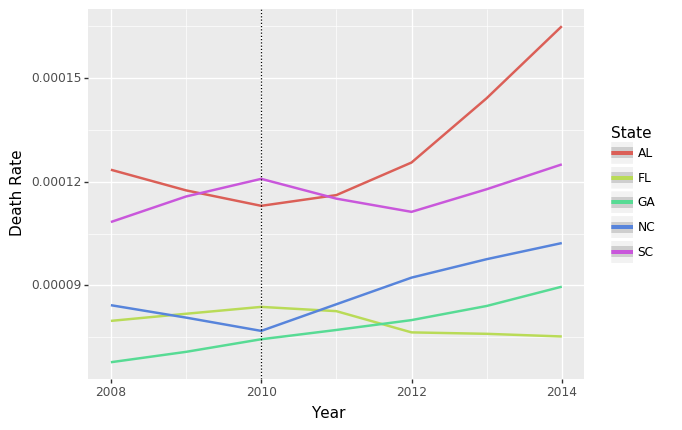

<ggplot: (178231388210)>

In [353]:
fig=(ggplot(aes(x='Year', y='Death Rate', group = 'State', color = 'State') , data = df_sel1) + geom_smooth()  + geom_vline(xintercept=2010, linetype = "dotted") + xlim(2008, 2014))
fig

In [354]:
# select WA and four adjacent States
df_sel2=df_final_2[(df_final_2['State']=='WA') | (df_final_2['State']=='ID') | (df_final_2['State']=='CA') |(df_final_2['State']=='MT') | (df_final_2['State']=='NV') ]


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


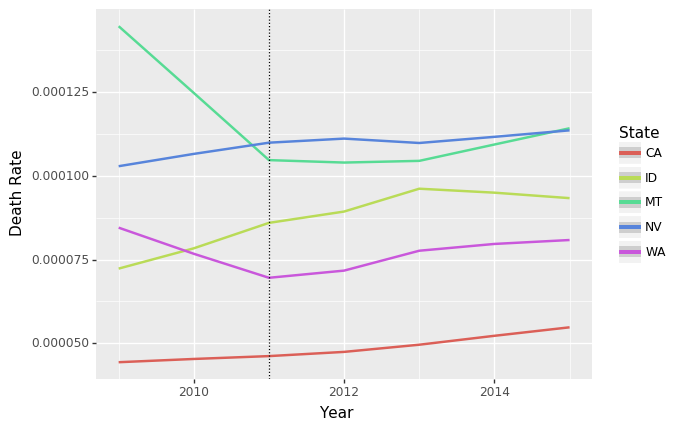

<ggplot: (178229465187)>

In [355]:
fig=(ggplot(aes(x='Year', y='Death Rate', group = 'State', color = 'State') , data = df_sel2) + geom_smooth()  + geom_vline(xintercept=2011, linetype = "dotted") + xlim(2009, 2015))
fig

In [357]:
# select TX and four adjacent States
df_sel3=df_final_2[(df_final_2['State']=='TX') | (df_final_2['State']=='LA') | (df_final_2['State']=='OK') |(df_final_2['State']=='NM') | (df_final_2['State']=='AK') ]


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


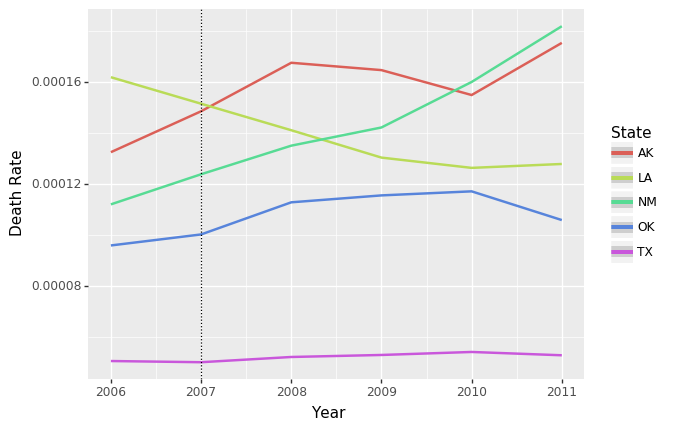

<ggplot: (178229598037)>

In [358]:
fig=(ggplot(aes(x='Year', y='Death Rate', group = 'State', color = 'State') , data = df_sel3) + geom_smooth()  + geom_vline(xintercept=2007, linetype = "dotted") + xlim(2006, 2011))
fig


In [320]:
#test=df_final.groupby("County")
#test.get_group("Baldwin County")